In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()

print(iris.data[:5])
print(iris.target)
print(iris.data[0, :], iris.target[0])
print(iris.DESCR)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[5.1 3.5 1.4 0.2] 0
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== =========

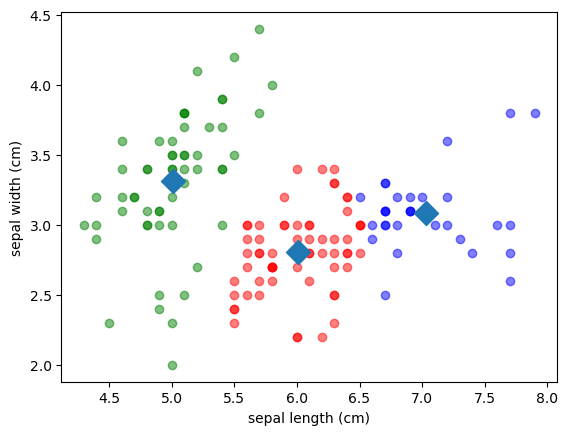

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from copy import deepcopy

iris = datasets.load_iris()

samples = iris.data

x = samples[:,0]
y = samples[:,1]

sepal_length_width = np.array(list(zip(x, y)))

# Step 1: Place K random centroids

k = 3

centroids_x = np.random.uniform(min(x), max(x), size=k)
centroids_y = np.random.uniform(min(y), max(y), size=k)

centroids = np.array(list(zip(centroids_x, centroids_y)))

def distance(a, b):
  one = (a[0] - b[0]) ** 2
  two = (a[1] - b[1]) ** 2
  distance = (one + two) ** 0.5
  return distance

# A function that assigns the nearest centroid to a sample
def assign_to_centroid(sample, centroids):
  k = len(centroids)
  distances = np.zeros(k)
  for i in range(k):
    distances[i] = distance(sample, centroids[i])
  closest_centroid = np.argmin(distances)
  return closest_centroid

# To store the value of centroids when it updates
centroids_old = np.zeros(centroids.shape)

# Cluster labeles (either 0, 1, or 2)
labels = np.zeros(len(samples))

distances = np.zeros(3)

# Initialize error:
error = np.zeros(3)

for i in range(k):
  error[i] = distance(centroids[i], centroids_old[i])

# Repeat Steps 2 and 3 until convergence:

while error.all() != 0:

  # Step 2: Assign samples to nearest centroid

  for i in range(len(samples)):
    labels[i] = assign_to_centroid(samples[i], centroids)

  # Step 3: Update centroids

  centroids_old = deepcopy(centroids)

  for i in range(k):
    points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
    centroids[i] = np.mean(points, axis=0)
    error[i] = distance(centroids[i], centroids_old[i])

colors = ['r', 'g', 'b']

for i in range(k):
  points = np.array([sepal_length_width[j] for j in range(len(samples)) if labels[j] == i])
  plt.scatter(points[:, 0], points[:, 1], c=colors[i], alpha=0.5)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=150)

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.show()


In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.cluster import KMeans

iris = datasets.load_iris()

samples = iris.data

model = KMeans(n_clusters=3)

model.fit(samples)

labels = model.predict(samples)

print(labels)
print(model.inertia_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
78.85144142614601


/Users/benson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


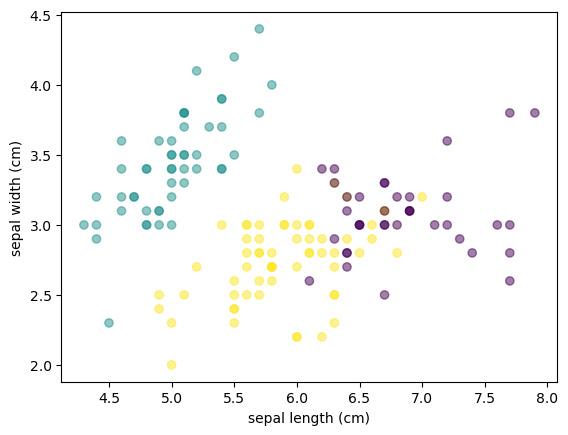

In [4]:
x = samples[:,0]
y = samples[:,1]
plt.scatter(x, y, c=labels, alpha=0.5)

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.show()

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd

iris = datasets.load_iris()

samples = iris.data

target = iris.target

model = KMeans(n_clusters=3)

model.fit(samples)

labels = [iris.target_names[s] for s in model.predict(samples)]

# Code starts here:
species = [iris.target_names[t] for t in list(target)]
df = pd.DataFrame({'labels': labels, 'species': species})

print(df)
ct = pd.crosstab(df['labels'], df['species'])
print(ct)


         labels    species
0        setosa     setosa
1        setosa     setosa
2        setosa     setosa
3        setosa     setosa
4        setosa     setosa
..          ...        ...
145   virginica  virginica
146  versicolor  virginica
147   virginica  virginica
148   virginica  virginica
149  versicolor  virginica

[150 rows x 2 columns]
species     setosa  versicolor  virginica
labels                                   
setosa          50           0          0
versicolor       0          48         14
virginica        0           2         36


/Users/benson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/Users/benson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/benson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/benson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/benson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

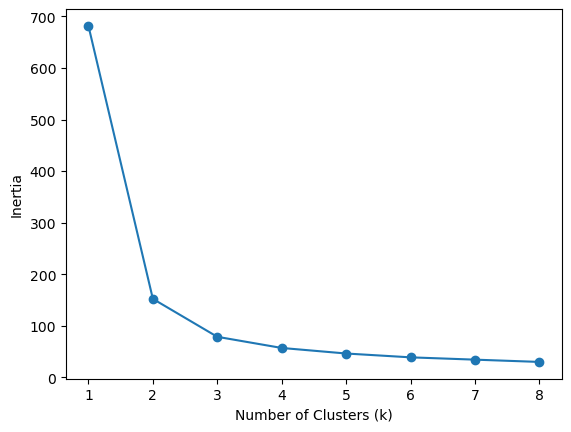

In [6]:
num_clusters = list(range(1, 9))
inertias = []
for k in num_clusters:
  model = KMeans(n_clusters=k)
  model.fit(samples)
  inertias.append(model.inertia_)

plt.plot(num_clusters, inertias, '-o')

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.show()